In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
import dtale
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('tedsd_puf_2019.csv')

In [3]:
df.shape

(1722503, 76)

In [4]:
df.head()

,DISYR,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,LOS,PSOURCE,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
0,2019,20191553576,2,-9,4,1,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,1
1,2019,20191465214,2,-9,3,1,7,-9,35,1,...,0,0,0,0,0,0,9,4,0,3
2,2019,20191443889,2,-9,2,1,7,-9,35,1,...,0,0,0,0,0,0,9,4,0,3
3,2019,20191409377,2,-9,3,1,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,3
4,2019,20191479567,2,-9,3,3,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,1


In [5]:
df.columns

Index(['DISYR', 'CASEID', 'STFIPS', 'CBSA2010', 'EDUC', 'MARSTAT', 'SERVICES',
       'DETCRIM', 'LOS', 'PSOURCE', 'NOPRIOR', 'ARRESTS', 'EMPLOY', 'METHUSE',
       'PSYPROB', 'PREG', 'GENDER', 'VET', 'LIVARAG', 'DAYWAIT', 'SERVICES_D',
       'REASON', 'EMPLOY_D', 'LIVARAG_D', 'ARRESTS_D', 'DSMCRIT', 'AGE',
       'RACE', 'ETHNIC', 'DETNLF', 'DETNLF_D', 'PRIMINC', 'SUB1', 'SUB2',
       'SUB3', 'SUB1_D', 'SUB2_D', 'SUB3_D', 'ROUTE1', 'ROUTE2', 'ROUTE3',
       'FREQ1', 'FREQ2', 'FREQ3', 'FREQ1_D', 'FREQ2_D', 'FREQ3_D', 'FRSTUSE1',
       'FRSTUSE2', 'FRSTUSE3', 'HLTHINS', 'PRIMPAY', 'FREQ_ATND_SELF_HELP',
       'FREQ_ATND_SELF_HELP_D', 'ALCFLG', 'COKEFLG', 'MARFLG', 'HERFLG',
       'METHFLG', 'OPSYNFLG', 'PCPFLG', 'HALLFLG', 'MTHAMFLG', 'AMPHFLG',
       'STIMFLG', 'BENZFLG', 'TRNQFLG', 'BARBFLG', 'SEDHPFLG', 'INHFLG',
       'OTCFLG', 'OTHERFLG', 'DIVISION', 'REGION', 'IDU', 'ALCDRUG'],
      dtype='object')

In [6]:
df.nunique(axis=0)

DISYR             1
CASEID      1722503
STFIPS           49
CBSA2010        279
EDUC              6
             ...   
OTHERFLG          2
DIVISION         10
REGION            5
IDU               3
ALCDRUG           4
Length: 76, dtype: int64

In [7]:
#df.describe()

In [8]:
# state_list = df['STFIPS'].unique().tolist()
# state_list

In [9]:
state_dict = {1:'Alabama',2:'Alaska',4:'Arizona', 5:'Arkansas',6:'California',8:'Colorado',9:'Connecticut',
              10:'Delaware', 11:'District of Columbia', 12:'Florida', 13:'Georgia', 15:'Hawaii', 16:'Idaho', 
              17:'Illinois', 18:'Indiana', 19:'Iowa', 20:'Kansas', 21:'Kentucky', 22:'Louisiana', 23:'Maine', 
              24:'Maryland', 25:'Massachusetts', 26:'Michigan', 27:'Minnesota', 28:'Mississippi', 29:'Missouri',
              30:'Montana', 31:'Nebraska', 32:'Nevada', 33:'New Hampshire', 34:'New Jersey', 35:'New Mexico', 
              36:'New York', 37:'North Carolina', 38:'North Dakota', 39:'Ohio', 40:'Oklahoma', 42:'Pennsylvania',
              44:'Rhode Island', 45:'South Carolina', 46:'South Dakota', 47:'Tennessee', 48:'Texas', 49:'Utah',
              50:'Vermont', 51:'Virginia', 55:'Wisconsin', 56:'Wyoming', 72:'Puerto Rico'}

In [10]:
#df = df.replace(-9, np.nan) #Replace coded missing values

In [11]:
# pd.options.display.max_rows = 100
# print(df.dtypes) #Confirm that all data is numerical

## PCA Testing (Select Features, 2 components)

In [12]:
features = ['LOS','SERVICES','PSOURCE','SUB1','ROUTE1','FREQ1','DSMCRIT','PSYPROB','HLTHINS']

x = df.loc[:, features].values

y = df.loc[:, ['REASON']].values

x = StandardScaler().fit_transform(x)

In [25]:
from sklearn.decomposition import PCA

pca = (PCA(n_components=2))

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
                          , columns = ['PC1','PC2'])

finalDf = pd.concat([principalDf, df[['REASON']]], axis=1)


,PC1,PC2,REASON
0,0.542459,-1.164084,1
1,0.448015,-1.129560,3
2,0.531170,-1.063148,3
3,0.574566,-1.251076,1
4,0.574566,-1.251076,3


(-3.0, 3.0)

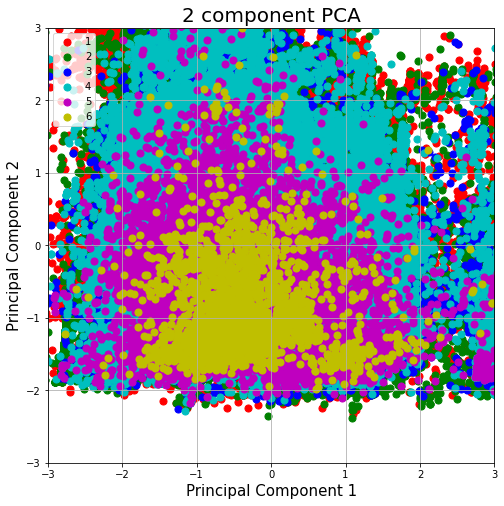

In [34]:
%matplotlib inline

fig = plt.figure(figsize =(8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,2,3,4,5,6]
#targets = ['Treatment Completed','Dropout','Terminated by Facility','Transfer','Incarcerated','Death','Other']
colors = ['r', 'g', 'b','c','m','y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['REASON'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

ax.set_xlim([-3,3])
ax.set_ylim([-3,3])

## PCA Testing (All Columns, 2 components)

In [35]:
#All Columns

x = df.loc[:, df.columns != 'REASON'].values

y = df.loc[:, ['REASON']].values

x = StandardScaler().fit_transform(x)

In [37]:
pca = (PCA(n_components=2))

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
                          , columns = ['PC1','PC2'])

finalDf = pd.concat([principalDf, df[['REASON']]], axis=1)

(-5.0, 5.0)

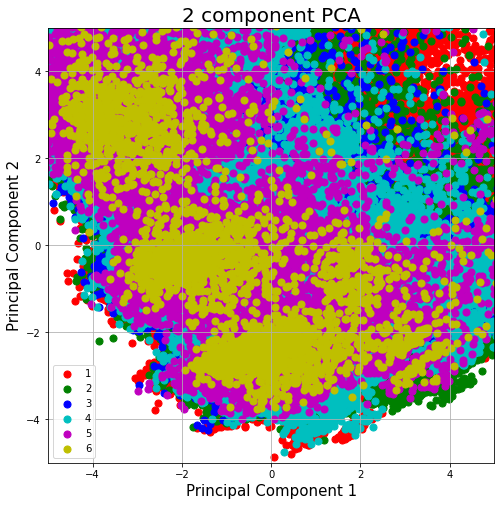

In [39]:
%matplotlib inline

fig = plt.figure(figsize =(8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,2,3,4,5,6]
#targets = ['Treatment Completed','Dropout','Terminated by Facility','Transfer','Incarcerated','Death','Other']
colors = ['r', 'g', 'b','c','m','y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['REASON'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

ax.set_xlim([-5,5])
ax.set_ylim([-5,5])

### PCA Variance and Clustering?

([<matplotlib.axis.XTick at 0x1736dc1a250>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

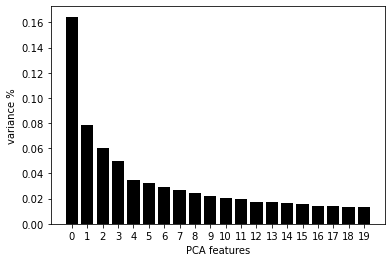

In [49]:
from sklearn.cluster import KMeans

pca = PCA(n_components=20)
principalComponents = pca.fit_transform(x)

features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

Looks like a slight dropoff after four components.

Text(0, 0.5, 'PCA 2')

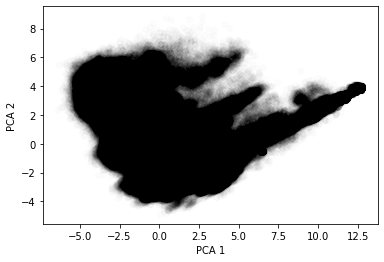

In [45]:
PCA_components_df = pd.DataFrame(principalComponents)

plt.scatter(PCA_components_df[0], PCA_components_df[1], alpha=.01, color='black') #Alpha reduced to look for clustering
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

Roughly three clusters? Hard to reduce alpha much further for clarity.

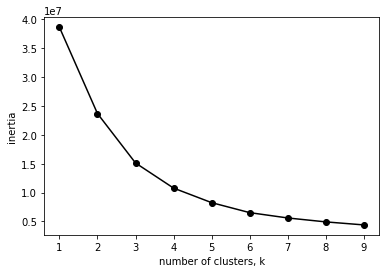

In [47]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components_df.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Slight elbow after 3 clusters.